# Vehicle Detection

Vehicle Detection Project

The goals / steps of this project are the following:

- Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
- Apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
- Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
- Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
- Estimate a bounding box for vehicles detected.

A PDF version of this report would be made available within this repository

## Histogram of Oriented Gradients (HOG)

**Explain how (and identify where in your code) you extracted HOG features from the training images.**

The code for this step is contained in the first code cell of the IPython notebook.

I started by reading in all the vehicle and non-vehicle images. 
The vehicle images are generously provided by GTI vehicle image database and the KITTI vision benchmark suite.

In order to get the images in, we would run the following commands in linux/mac environment

```
wget https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/vehicles.zip
wget https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/non-vehicles.zip
unzip vehicles.zip
unzip non-vehicles.zip
```

Running the bash commands above would yield the vehicles and non-vehicles folders which would contain the images that would be used to train to identify vehicles in an image.

Here is an example of one of each of the vehicle and non-vehicle classes:

(64, 64, 3)


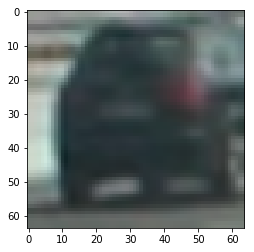

In [3]:
# Example Vehicle image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('./vehicles/GTI_Left/image0019.png')
print(image.shape)
plt.imshow(image)

(64, 64, 3)


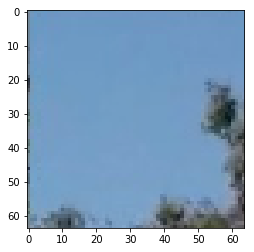

In [4]:
# Example Non-Vehicle image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('./non-vehicles/Extras/extra1.png')
print(image.shape)
plt.imshow(image)

**Observation of Example Images**

Images are generally of 64 by 64 color images.

**Explain how you settled on your final choice of HOG parameters.**

Before selecting how the HOG parameters were decided on, we would first do some quick data exploration to determine what would be the best color channel to try to use HOG on. (HOG works on a single color channel). After which, we do some quick data exploration on the effects of the HOG parameters on the output of the HOG variable.

In [ ]:
import cv2

# Defining color filters

def rgb_convert(image, filter=None):
    '''
    Provide RGB image for processing. Allows one to select color filter and even color thresholding
    '''
    # Apply color filter
    if filter == 'r':
        image = image[:,:,0]
    if filter == 'g':
        image = image[:,:,1]
    if filter == 'b':
        image = image[:,:,2]
    return image

def hls_convert(image, filter=None):
    '''
    Provide RGB image for processing. Image will be converted to hls image. Allow one to select hls filter and hls
    thresholding
    '''
    # Convert to hls image
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    
    # Apply color filter
    if filter == 'h':
        image = image[:,:,0]
    if filter == 'l':
        image = image[:,:,1]
    if filter == 's':
        image = image[:,:,2]
    return image

def gray_convert(image):
    '''
    Wrapper to easily reference to convert image to gray image
    '''
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return image

Describe how (and identify where in your code) you trained a classifier using your selected HOG features (and color features if you used them).

I trained a linear SVM using...

## Sliding Window Search

**Describe how (and identify where in your code) you implemented a sliding window search. How did you decide what scales to search and how much to overlap windows?**

DESCRIPTION TO BE ADDED

**Show some examples of test images to demonstrate how your pipeline is working. What did you do to optimize the performance of your classifier?**

Ultimately I searched on two scales using YCrCb 3-channel HOG features plus spatially binned color and histograms of color in the feature vector, which provided a nice result. Here are some example images:

## Video Implementation

**Provide a link to your final video output. Your pipeline should perform reasonably well on the entire project video (somewhat wobbly or unstable bounding boxes are ok as long as you are identifying the vehicles most of the time with minimal false positives.)**

ADD VIDEO LINK HERE

**Describe how (and identify where in your code) you implemented some kind of filter for false positives and some method for combining overlapping bounding boxes.**

I recorded the positions of positive detections in each frame of the video. From the positive detections I created a heatmap and then thresholded that map to identify vehicle positions. I then used scipy.ndimage.measurements.label() to identify individual blobs in the heatmap. I then assumed each blob corresponded to a vehicle. I constructed bounding boxes to cover the area of each blob detected.

Here's an example result showing the heatmap from a series of frames of video, the result of scipy.ndimage.measurements.label() and the bounding boxes then overlaid on the last frame of video: